## Stock Price Prediction (low or high)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and preprocessing

In [2]:
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
df.shape

(1692, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


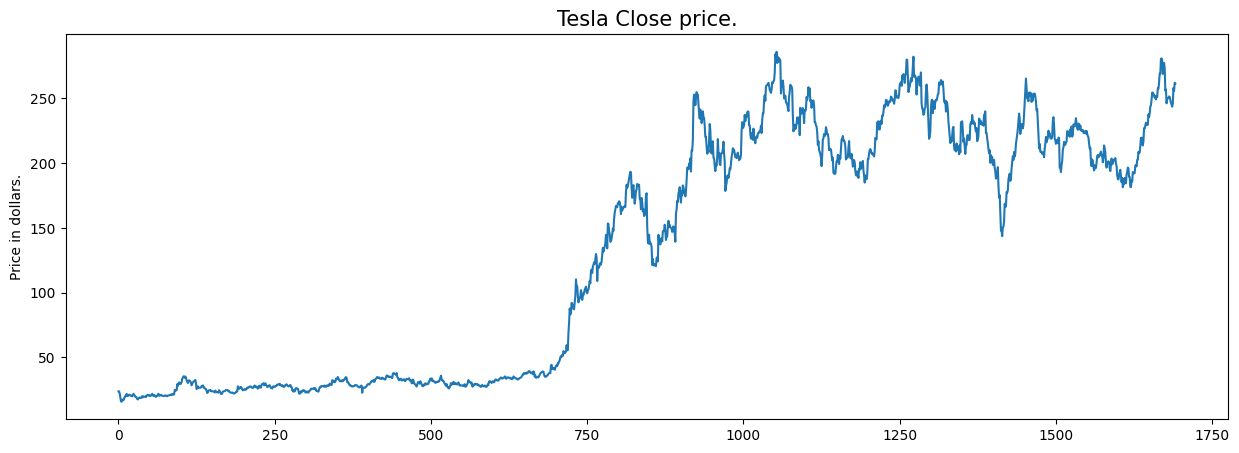

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [8]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [9]:
df = df.drop(['Adj Close'], axis=1)

In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

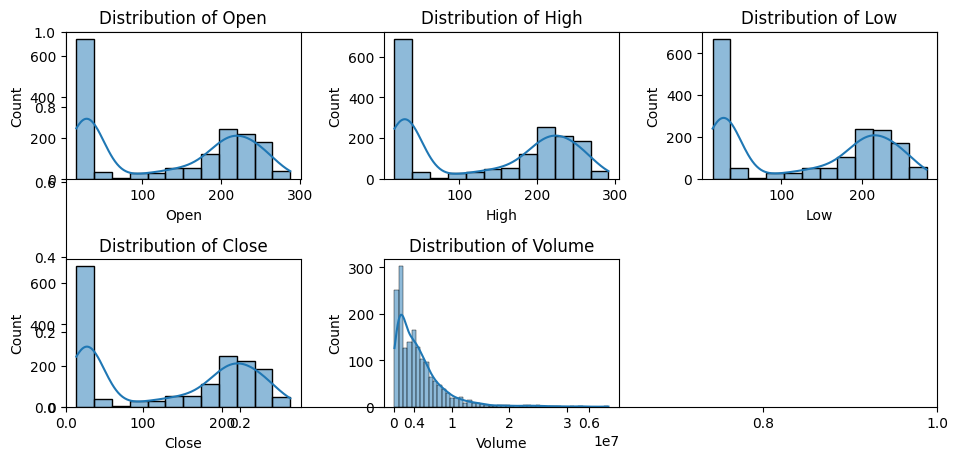

In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(10, 5))
for i, col in enumerate(features):
    ax = plt.subplot(2, 3, i + 1)        # grab the current axes
    sns.histplot(
        data=df,
        x=col,
        kde=True,                        
        ax=ax
    )
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

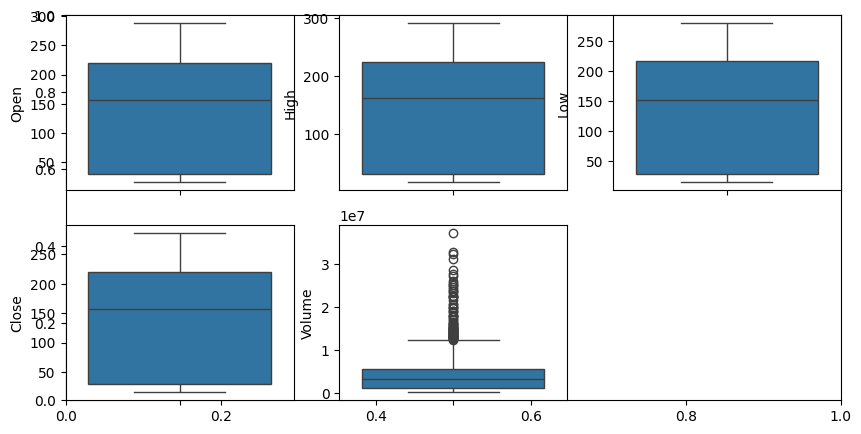

In [12]:
plt.subplots(figsize=(10,5))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [13]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


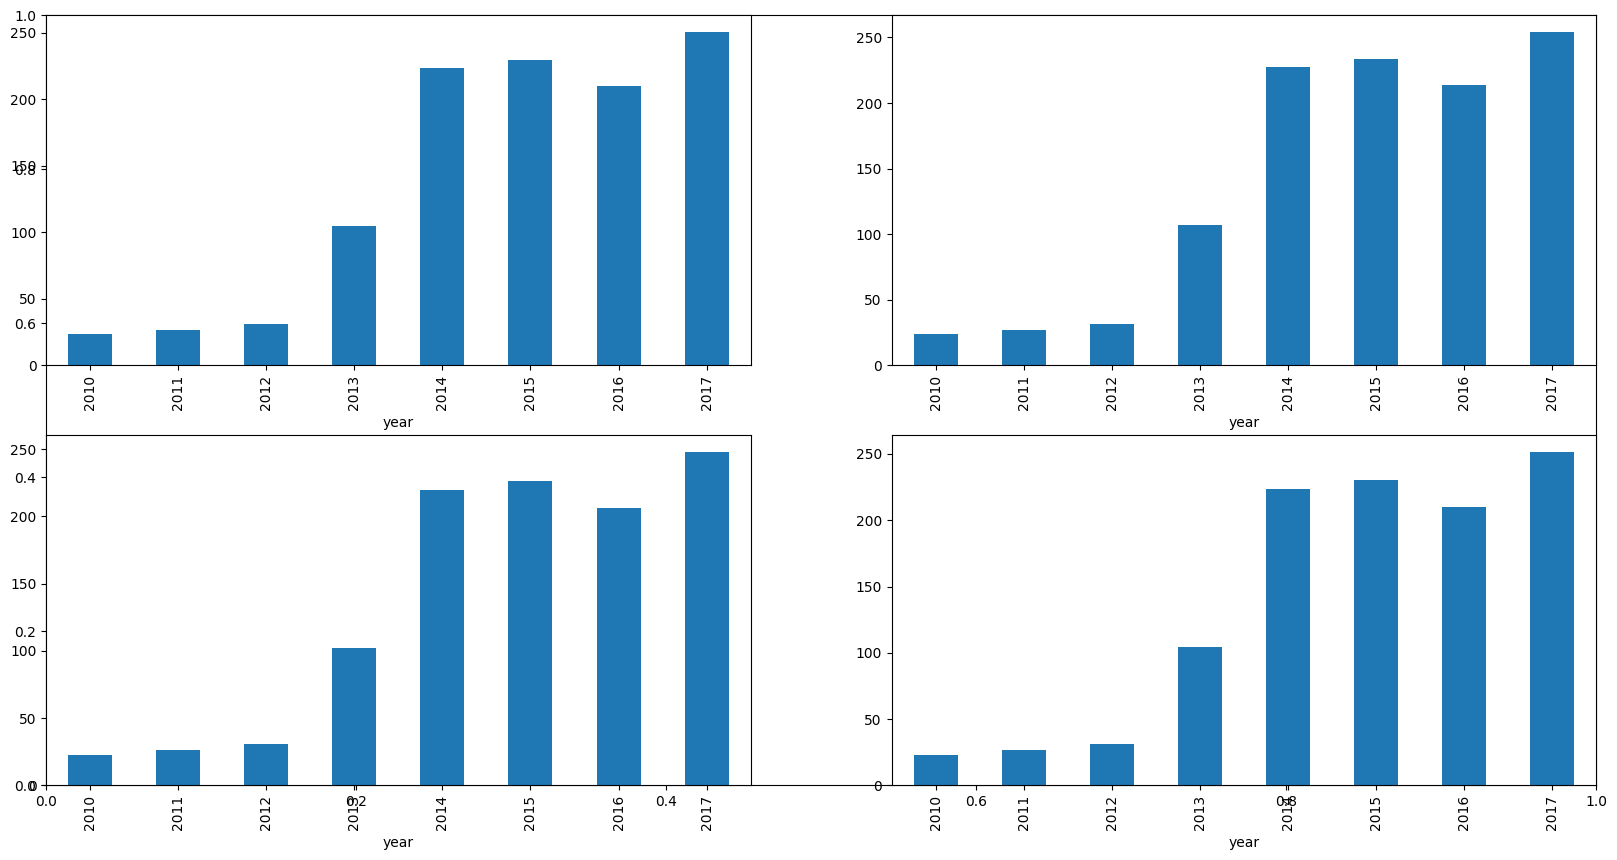

In [15]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [16]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


In [17]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

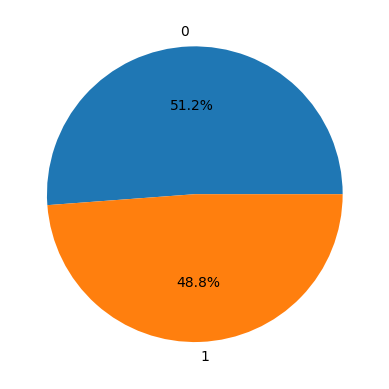

In [18]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

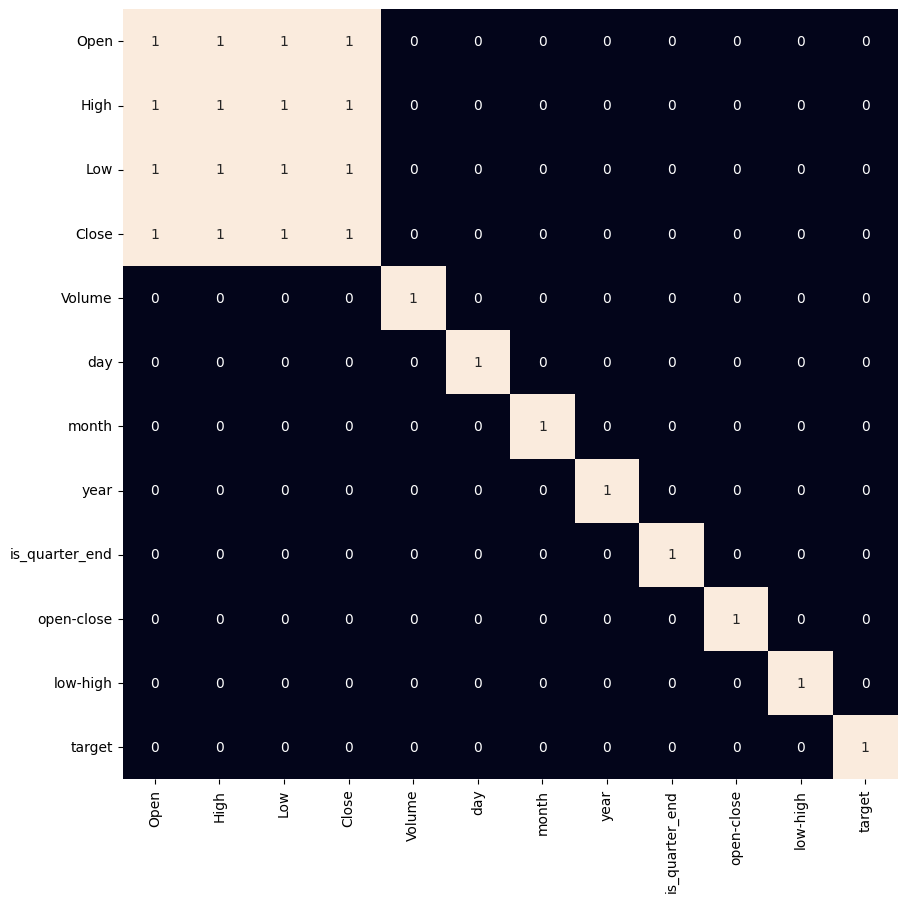

In [19]:
plt.figure(figsize=(10, 10))  
sns.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0


## Selecting Features and target

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
X= df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
scaler = StandardScaler()
features = scaler.fit_transform(X)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.1, random_state=42,stratify=target)
print(X_train.shape, X_test.shape)

(1522, 3) (170, 3)


## Apply different model

In [24]:
# model=XGBClassifier()
# model=SVC()
# model=LogisticRegression()
model=RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [25]:
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


## Evaluation

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score
y_pred=model.predict(X_test)
pre=precision_score(y_pred,Y_test)
f1=f1_score(y_pred,Y_test)
rec=recall_score(y_pred,Y_test)

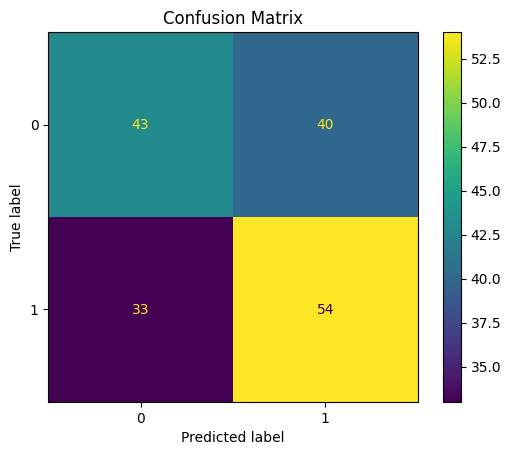

In [27]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

## Model testing

In [28]:
X_test[:10]

array([[ 1.51595783, -0.26700997, -0.70898822],
       [-0.18767625, -0.12202026,  1.41046067],
       [ 0.94717625, -0.54224483, -0.70898822],
       [-0.22830124,  0.76266815, -0.70898822],
       [-1.28189916, -0.68723428, -0.70898822],
       [ 0.01004448,  0.91503123,  1.41046067],
       [-0.20663343, -0.19328872, -0.70898822],
       [ 0.35672984,  0.70368899, -0.70898822],
       [-0.34476847, -0.27438187, -0.70898822],
       [ 0.05879789,  1.00595695,  1.41046067]])

In [29]:
Y_test

390     1
1248    1
1105    1
101     1
1151    0
       ..
619     0
1456    1
718     1
682     0
419     1
Name: target, Length: 170, dtype: int64

In [30]:
import numpy as np

X_new= np.array([ 0.01004448,  0.91503123,  1.41046067]).reshape(1, -1)
y_pred = model.predict(X_new)
y_proba = model.predict_proba(X_new)
print("Predicted Class:", y_pred[0])
print("Probability [Down, Up]:", y_proba[0])

Predicted Class: 0
Probability [Down, Up]: [0.52 0.48]


In [31]:
import numpy as np

X_new_scaled = np.array([ 1.51595783, -0.26700997, -0.70898822]).reshape(1, -1)
y_pred = model.predict(X_new_scaled)
y_proba = model.predict_proba(X_new_scaled)
print("Predicted Class:", y_pred[0])
print("Probability [Down, Up]:", y_proba[0])

Predicted Class: 1
Probability [Down, Up]: [0.33 0.67]
